In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('/kaggle/input/bangla-news/Bangla_news.csv',
                 encoding='utf-8',
                 sep=',',
                 engine='python')

In [3]:
df.head()

,title,published_date,reporter,category,url,content
0,"সিন নদীতে ব্যাপক দূষণ, স্থগিত করা হলো ট্রায়াথ...","30th July, 2024 5:59 pm",আরআইএম,sports,https://jamuna.tv/news/552127,ছবি: সংগৃহীত সিন নদীতে অলিম্পিকের উদ্বোধনী অনু...
1,এসিসির নতুন সভাপতি হচ্ছেন মহসিন নাকভি!,"30th July, 2024 5:25 pm",NaN,sports,https://jamuna.tv/news/552123,২০২৫ সালের জানুয়ারিতে এশিয়ান ক্রিকেট কাউন্স...
2,২০৩০ ও ২০৩৪ বিশ্বকাপের হোস্ট জানা যাবে দুইদিন পর!,"30th July, 2024 1:22 pm",আরআইএম,sports,https://jamuna.tv/news/552066,ফিফা বিশ্বকাপ ২০৩০ ও ৩৪ সালের স্বাগতিক হবার ল...
3,প্যারিস অলিম্পিক: কোয়ার্টার ফাইনালে ওঠার লক্ষ্...,"30th July, 2024 11:54 am",এনকে,sports,https://jamuna.tv/news/552046,প্যারিস অলিম্পিকে কোয়ার্টার ফাইনাল রেসে টিকে ...
4,আজ টিভিতে যা দেখবেন (৩০ জুলাই ২০২৪),"30th July, 2024 7:01 am",এনকে,sports,https://jamuna.tv/news/552016,আজ ভারত–শ্রীলঙ্কার তৃতীয় টি–টোয়েন্টি অলিম্পিকে...


In [4]:
len(df)

11904

In [5]:
df['category'].unique()

array(['sports', 'international', 'entertainment', 'national'],
      dtype=object)

In [6]:
df['content'][0]

'ছবি: সংগৃহীত সিন নদীতে অলিম্পিকের উদ্বোধনী অনুষ্ঠান হয়েছিল। এই নদীর পানি একেবারে দূষণমুক্ত, তা প্রমাণে প্যারিসের মেয়র নিজেই পানিতে নেমে পড়েছিলেন। কিন্তু এত কিছুর পরও সিন নদীকে দূষণমুক্ত প্রমাণ করা গেল না। দূষণের কারণে সিন নদীতে অনুষ্ঠিতব্য অলিম্পিকের ট্রায়াথলন ইভেন্ট স্থগিত করা হয়েছে। খবর দ্য গার্ডিয়ানের। জানা গেছে, সিন নদীর দূষণের ইতিহাস বেশ পুরোনো। প্রায় ১০০ বছর আগে ১৯২৩ সালে নদীটিতে সাঁতার কাটা নিষিদ্ধ করে দেয়া হয়। নদীর পানিতে ব্যাকটেরিয়ার পরিমাণ বেশি থাকে বলে এই নদীতে সাঁতার কাটা নিরাপদ নয়। তাই ট্রায়াথলন ইভেন্টের জন্য এই নদীকে বেছে নেয়ার পরপরই সমালোচনা শুরু হয়েছিল।'

In [7]:
df['title'][0]

'সিন নদীতে ব্যাপক দূষণ, স্থগিত করা হলো ট্রায়াথলন ইভেন্ট'

In [8]:
df.drop(columns=['published_date','reporter','url'],inplace=True)

In [9]:
df.sample(3)

,title,category,content
8479,ইউক্রেন-রাশিয়ার মতোই যুদ্ধ হয়েছে এই চেয়ার নিয়ে...,entertainment,অভিনেতা জায়েদ খান। ইউক্রেন-রাশিয়ার মতোই যুদ্ধ ...
9556,বাড্ডায় কাভার্ড ভ্যানের ধাক্কায় মোটরসাইকেল আরো...,national,রাজধানীর বাড্ডা এলাকায় কাভার্ড ভ্যানের ধাক্কা...
9277,কোটা পরিবর্তন-পরিবর্ধন করতে পারবে সরকার: হাইকো...,national,ফাইল ছবি সরকারি চাকরিতে কোটা সংস্কারের দাবিতে ...


In [10]:
df['text'] = df['title'] + " " + df['content']

In [11]:
df.head()

,title,category,content,text
0,"সিন নদীতে ব্যাপক দূষণ, স্থগিত করা হলো ট্রায়াথ...",sports,ছবি: সংগৃহীত সিন নদীতে অলিম্পিকের উদ্বোধনী অনু...,"সিন নদীতে ব্যাপক দূষণ, স্থগিত করা হলো ট্রায়াথ..."
1,এসিসির নতুন সভাপতি হচ্ছেন মহসিন নাকভি!,sports,২০২৫ সালের জানুয়ারিতে এশিয়ান ক্রিকেট কাউন্স...,এসিসির নতুন সভাপতি হচ্ছেন মহসিন নাকভি! ২০২৫ স...
2,২০৩০ ও ২০৩৪ বিশ্বকাপের হোস্ট জানা যাবে দুইদিন পর!,sports,ফিফা বিশ্বকাপ ২০৩০ ও ৩৪ সালের স্বাগতিক হবার ল...,২০৩০ ও ২০৩৪ বিশ্বকাপের হোস্ট জানা যাবে দুইদিন ...
3,প্যারিস অলিম্পিক: কোয়ার্টার ফাইনালে ওঠার লক্ষ্...,sports,প্যারিস অলিম্পিকে কোয়ার্টার ফাইনাল রেসে টিকে ...,প্যারিস অলিম্পিক: কোয়ার্টার ফাইনালে ওঠার লক্ষ্...
4,আজ টিভিতে যা দেখবেন (৩০ জুলাই ২০২৪),sports,আজ ভারত–শ্রীলঙ্কার তৃতীয় টি–টোয়েন্টি অলিম্পিকে...,আজ টিভিতে যা দেখবেন (৩০ জুলাই ২০২৪) আজ ভারত–শ্...


In [12]:
df.drop(columns=['title','content'],inplace=True)

In [13]:
df = df[['text','category']]

In [14]:
df.head()

,text,category
0,"সিন নদীতে ব্যাপক দূষণ, স্থগিত করা হলো ট্রায়াথ...",sports
1,এসিসির নতুন সভাপতি হচ্ছেন মহসিন নাকভি! ২০২৫ স...,sports
2,২০৩০ ও ২০৩৪ বিশ্বকাপের হোস্ট জানা যাবে দুইদিন ...,sports
3,প্যারিস অলিম্পিক: কোয়ার্টার ফাইনালে ওঠার লক্ষ্...,sports
4,আজ টিভিতে যা দেখবেন (৩০ জুলাই ২০২৪) আজ ভারত–শ্...,sports


In [15]:
# Count category distribution
category_counts = df['category'].value_counts()
print(category_counts)

# Check class proportions
category_percent = df['category'].value_counts(normalize=True) * 100
print(category_percent)

category
sports           2976
international    2976
entertainment    2976
national         2976
Name: count, dtype: int64
category
sports           25.0
international    25.0
entertainment    25.0
national         25.0
Name: proportion, dtype: float64


In [16]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations

                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)

    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰⚽️✌�￰৷￰'''

    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

In [17]:
import re
def clean_sentence(sent):

    sent = re.sub('[?.`*^()!°¢܌Ͱ̰ߒנ~×Ҡߘ:ҰߑÍ|।;!,&%\'@#$><A-Za-z0+-9=./''""_০-৯]', '', sent)
    sent = re.sub(r'(\W)(?=\1)', '', sent)
    sent = re.sub(r'https?:\/\/.*[\r\n]*', '', sent, flags=re.MULTILINE)
    sent = re.sub(r'\<a href', ' ', sent)
    sent = re.sub(r'&amp;', '', sent)
    sent = re.sub(r'\U0001F600-\U0001F64F','',sent)
    sent = re.sub(r'\U0001F300-\U0001F5FF','',sent)
    sent = re.sub(r'\U0001F680-\U0001F6FF','',sent)
    sent = re.sub(r'\u00C0-\u017F','',sent)
    sent = re.sub(r'\U0001F1E0-\U0001F1FF','',sent)
    sent = re.sub(r'\U00002702-\U000027B0','',sent)
    sent = re.sub(r'\U000024C2-\U0001F251','',sent)
    sent = re.sub(r'\u2000-\u206F','',sent)

    sent = re.sub(r'<br />', ' ', sent)
    sent = re.sub(r'\'', ' ', sent)
    sent = re.sub(r'ߑͰߑ̰ߒנ', '', sent)
    sent = re.sub(r'ߎɰߎɰߎɍ', '', sent)

    sent = sent.strip()
    return sent

In [18]:
stop_words = {'এ', 'হয়', 'কি', 'কী', 'এর', 'কে', 'যে', 'এই', 'বা', 'সব', 'টি', 'তা',
       'সে', 'তাই', 'সেই', 'তার', 'আগে', 'যদি', 'আছে', 'আমি', 'এবং', 'করে', 'কার', 'এটি', 'হতে', 'যায়',
       'আরও', 'যাক', 'খুব', 'উপর', 'পরে', 'হবে', 'কেন', 'কখন', 'সকল', 'হয়', 'ঠিক', 'একই', 'কোন',
       'ছিল', 'খুবই', 'কোনো', 'অধীন', 'যারা', 'তারা', 'গুলি', 'তাকে', 'সেটা', 'সময়', 'আমার', 'আমরা', 'সবার',
       'উভয়', 'একটা', 'আপনি', 'নিয়ে', 'একটি', 'বন্ধ', 'জন্য', 'শুধু', 'যেটা', 'উচিত', 'মাঝে', 'থেকে', 'করবে',
       'আবার', 'উপরে', 'সেটি', 'কিছু', 'কারণ', 'যেমন', 'তিনি', 'মধ্যে', 'আমাকে', 'করছেন', 'তুলনা', 'তারপর',
       'নিজেই', 'থাকার', 'নিজের', 'পারেন', 'একবার', 'সঙ্গে', 'ইচ্ছা', 'নীচের', 'এগুলো', 'আপনার', 'অধীনে', 'কিংবা',
       'এখানে', 'তাহলে', 'কয়েক', 'জন্যে', 'হচ্ছে', 'তাদের', 'কোথায়', 'কিন্তু', 'নিজেকে', 'যতক্ষণ', 'আমাদের',
       'দ্বারা', 'হয়েছে', ' সঙ্গে', 'সেখানে', 'কিভাবে', 'মাধ্যমে', 'নিজেদের', 'তুলনায়', 'প্রতিটি',
       'তাদেরকে', 'ইত্যাদি', 'সম্পর্কে', 'সর্বাধিক', 'বিরুদ্ধে', 'অন্যান্য'}

def remove_stop_words(text):
    text = [w for w in text if not w in stop_words]
    text = ' '.join(text)
    return text

In [19]:
def tokenized_data(sent):
    tokenized_text = sent.split()
    return tokenized_text

In [20]:
df.dropna(subset=['text'],inplace=True)
df['text'] = [remove_stop_words(tokenized_data(sent)) for sent in df['text'].tolist()]
df['text'] = df.text.apply(lambda x: preprocessing(str(x)))

In [21]:
df.head()

,text,category
0,সিন নদীতে ব্যাপক দূষণ স্থগিত করা হলো ট্রায়াথল...,sports
1,এসিসির নতুন সভাপতি হচ্ছেন মহসিন নাকভি সালের জ...,sports
2,ও বিশ্বকাপের হোস্ট জানা যাবে দুইদিন পর ফিফা ...,sports
3,প্যারিস অলিম্পিক কোয়ার্টার ফাইনালে ওঠার লক্ষ্য...,sports
4,আজ টিভিতে যা দেখবেন জুলাই আজ ভারতশ্রীলঙ্কার ...,sports


In [22]:
! pip install -q transformers datasets torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00:00:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 21.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 3.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 229.4 kB/s eta 0:00:00a 0:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
bigfram

In [23]:
label2id = {'sports': 0, 'international': 1, 'entertainment': 2, 'national': 3}
df['label'] = df['category'].apply(lambda x: label2id[x])
df.head()

,text,category,label
0,সিন নদীতে ব্যাপক দূষণ স্থগিত করা হলো ট্রায়াথল...,sports,0
1,এসিসির নতুন সভাপতি হচ্ছেন মহসিন নাকভি সালের জ...,sports,0
2,ও বিশ্বকাপের হোস্ট জানা যাবে দুইদিন পর ফিফা ...,sports,0
3,প্যারিস অলিম্পিক কোয়ার্টার ফাইনালে ওঠার লক্ষ্য...,sports,0
4,আজ টিভিতে যা দেখবেন জুলাই আজ ভারতশ্রীলঙ্কার ...,sports,0


In [24]:
!pip install -q dataloader datasets

  Preparing metadata (setup.py) ... done


In [25]:
import torch
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
from torch.optim import AdamW
from transformers import AutoTokenizer, AutoModelForSequenceClassification, get_scheduler
from tqdm import tqdm


# Model and tokenizer
model_name = "sagorsarker/bangla-bert-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=4)

# Dataset class
class NewsDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenizer(list(texts), truncation=True, padding=True, max_length=512)
        self.labels = labels

    def __getitem__(self, idx):
        return {
            'input_ids': torch.tensor(self.encodings['input_ids'][idx]),
            'attention_mask': torch.tensor(self.encodings['attention_mask'][idx]),
            'labels': torch.tensor(self.labels[idx])
        }

    def __len__(self):
        return len(self.labels)

# 80% train, 10% val, 10% test split
train_texts, temp_texts, train_labels, temp_labels = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42, stratify=df['label'])
val_texts, test_texts, val_labels, test_labels = train_test_split(temp_texts, temp_labels, test_size=0.5, random_state=42, stratify=temp_labels)

train_dataset = NewsDataset(train_texts, train_labels.values)
val_dataset = NewsDataset(val_texts, val_labels.values)
test_dataset = NewsDataset(test_texts, test_labels.values)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8)
test_loader = DataLoader(test_dataset, batch_size=8)

# Optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=5e-5)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_training_steps = len(train_loader) * 10  # assuming 10 epochs max
lr_scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)

# Early stopping config
best_val_loss = float("inf")
patience = 2
patience_counter = 0
num_epochs = 20

# Training loop with early stopping
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    loop = tqdm(train_loader, desc=f"Epoch {epoch+1}")
    for batch in loop:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        train_loss += loss.item()

        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
        loop.set_postfix(loss=loss.item())

    # Validation loss
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch in val_loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            val_loss += outputs.loss.item()

    avg_val_loss = val_loss / len(val_loader)
    print(f"Validation Loss: {avg_val_loss:.4f}")

    # Early stopping check
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0
        # Save best model
        torch.save(model.state_dict(), "banglabert_category_model.pt")
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered.")
            break

# Save tokenizer separately
tokenizer.save_pretrained("banglabert_tokenizer")


config.json:   0%|          | 0.00/491 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/2.24M [00:00<?, ?B/s]

2025-05-30 19:01:08.916675: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748631669.380451      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748631669.510081      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


model.safetensors:   0%|          | 0.00/660M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at sagorsarker/bangla-bert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 1:   1%|          | 11/1191 [00:09<16:52,  1.17it/s, loss=1.01] 


KeyboardInterrupt: 

In [26]:
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Config
model_name = "sagorsarker/bangla-bert-base"
num_labels = 4
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Label mapping
label2id = {'sports': 0, 'international': 1, 'entertainment': 2, 'national': 3}
id2label = {v: k for k, v in label2id.items()}

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("/kaggle/input/banglabert-tokenizer/")
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)
model.load_state_dict(torch.load("/kaggle/input/bert/pytorch/default/1/banglabert_category_model.pt", map_location=device))
model.to(device)
model.eval()


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at sagorsarker/bangla-bert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(102025, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

✅ Accuracy: 0.9513

Classification Report:
               precision    recall  f1-score   support

       sports       0.98      0.99      0.98       297
international       0.99      0.85      0.92       298
entertainment       0.94      0.99      0.96       298
     national       0.90      0.98      0.94       298

     accuracy                           0.95      1191
    macro avg       0.95      0.95      0.95      1191
 weighted avg       0.95      0.95      0.95      1191



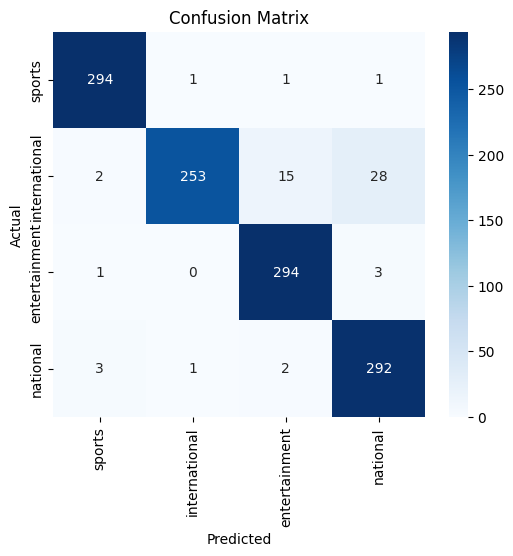

In [27]:
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in test_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        preds = torch.argmax(outputs.logits, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(batch['labels'].cpu().numpy())

# Accuracy
accuracy = accuracy_score(all_labels, all_preds)
print(f"✅ Accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=[id2label[i] for i in range(4)]))

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=id2label.values(), yticklabels=id2label.values(), cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [31]:
def predict_category(text):
    model.eval()
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    inputs = {k: v.to(device) for k, v in inputs.items()}
    
    with torch.no_grad():
        outputs = model(**inputs)
        pred = torch.argmax(outputs.logits, dim=1).item()
    
    return id2label[pred]

# 🔎 Example
# text = "বাংলাদেশ ক্রিকেট দল দুর্দান্ত খেলছে।"
# text = "শাকিব খানের নতুন সিনেমা ঈদে মুক্তি পাচ্ছে।"
# text = "প্রধানমন্ত্রী বলেছেন, আগামী বছর দেশের সব গ্রামে বিদ্যুৎ পৌঁছাবে।"
text = "যুক্তরাষ্ট্রে প্রেসিডেন্ট নির্বাচনে আবারো বাইডেন ও ট্রাম্প প্রতিদ্বন্দ্বিতা করছেন।"
print("Predicted Category:", predict_category(text))


Predicted Category: international
